# TRABAJO FINAL: CURSO DATA SCIENCE - MODULO 9
# TEMA: MODELO DE MANTENIMIENTO PREDICTIVO
## AUTOR: MIGUEL HUAYANEY MILLA
### DATASET: [KAGGLE](https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data)

# I. INTRODUCCIÓN:

Un asunto importante a considerar hoy en día por las empresa es garantizar la **disponibilidad** y **confiabilidad** de sus activos productivos (máquinas, equipos, automatismos, etc.), ya que son fundamentales para el cumplimiento de sus procesos productivos.

En el 2021, las empresas tuvieron que gastar entre el 21 a 40% del presupuesto operacional en actividades de mantenimiento. Así mismo, las empresas manufactureras destinan del 5 al 10% del presupuesto anual en mantenimiento.

Adicionalmente, las empresas tienden a esperar que la máquina falle (52%) para realizar un mantenimiento generando que se incurra en $ 260 000 en promedio como gastos por tiempos improductivos (paradas mecánicas no planificadas).

Por tal motivo, se recurrió al uso de las herramientas que ofrece la ciencia de datos con el fin de obtener un modelo que nos ayude a predecir una posible falla y en base a ello tomar decisiones oportunas.

Fuente: https://blog.infraspeak.com/es/mantenimiento-estadisticas-desafios-tendencias/

# II. INSTALACIÓN DE PRINCIPALES LIBRERIAS:

In [1]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 3.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style='whitegrid',context='notebook')

# III. CARGA DEL DATA SET:

**Nota**: El nombre del archivo original se llamaba "data.csv" por lo que se le cambio a "maintenance.csv".

In [4]:
df = pd.read_csv('/content/maintenance.csv')
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [5]:
df = df.clean_names()
df

,footfall,tempmode,aq,uss,cs,voc,rp,ip,temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


# IV. EDA:

In [6]:
df.dtypes.value_counts()

,count
int64,10


In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df.columns

Index(['footfall', 'tempmode', 'aq', 'uss', 'cs', 'voc', 'rp', 'ip',
       'temperature', 'fail'],
      dtype='object')

# V. CORRELACIONES:

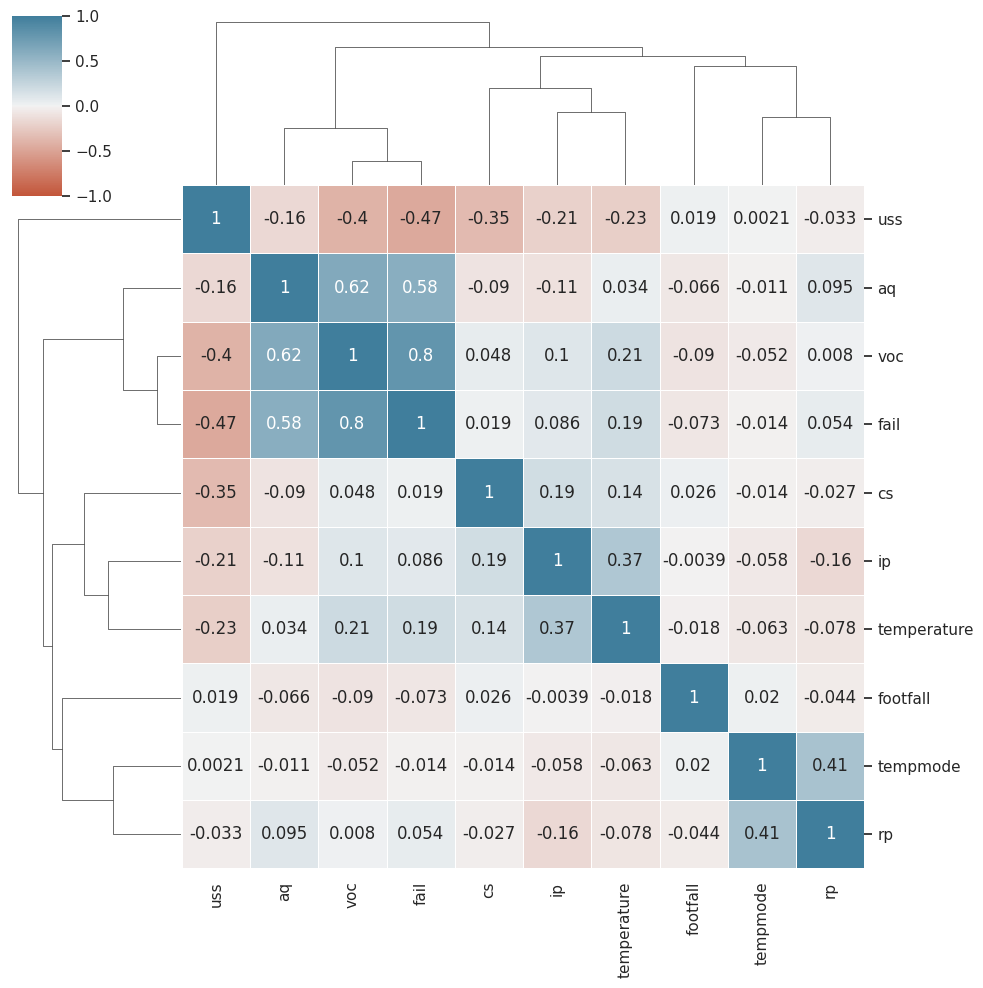

In [9]:
sns.clustermap(
    data=df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

In [10]:
corr_matrix = df.corr()
corr_fail = corr_matrix['fail']
corr_fail.sort_values(ascending=False)

,fail
fail,1.000000
voc,0.797329
aq,0.583238
temperature,0.190257
ip,0.085624
rp,0.053668
cs,0.018855
tempmode,-0.014462
footfall,-0.073066
uss,-0.466574


In [16]:
corr_filtered = corr_fail[corr_fail.abs() > 0.1]
cols = corr_filtered.index.tolist()
cols

['aq', 'uss', 'voc', 'temperature', 'fail']

In [17]:
df_data = df[cols].copy()
df_data.head(5)

,aq,uss,voc,temperature,fail
0,7,1,6,1,1
1,3,3,1,1,0
2,2,2,1,1,0
3,3,4,1,1,0
4,5,6,0,1,0


# VI. ESCALAMIENTO DE DATOS:

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
X = df[['aq', 'uss', 'voc', 'temperature']].values
y = df[['fail']].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [25]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.fit_transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.fit_transform(y_test)

# VII. EVALUAMOS LOS MODELOS:

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In [32]:
# Definir modelos de regresión
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Red Neural (MLP)": MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
}

# Evaluar cada modelo
def evaluar_modelo(modelo, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'\n{nombre}:')
    print(f'Error Cuadrático Medio (MSE): {mse:.4f}')
    print(f'Coeficiente de Determinación (R²): {r2:.4f}')
    return r2

# Comparar modelos
resultados = {}
for nombre, modelo in modelos.items():
    resultados[nombre] = evaluar_modelo(modelo, nombre)

# Mostrar el mejor modelo
mejor_modelo = max(resultados, key=resultados.get)
print(f'\nEl mejor modelo es: {mejor_modelo} con un R² de {resultados[mejor_modelo]:.4f}')



Regresión Lineal:
Error Cuadrático Medio (MSE): 0.3157
Coeficiente de Determinación (R²): 0.6843

Ridge:
Error Cuadrático Medio (MSE): 0.3157
Coeficiente de Determinación (R²): 0.6843

Lasso:
Error Cuadrático Medio (MSE): 0.3387
Coeficiente de Determinación (R²): 0.6613


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



Random Forest:
Error Cuadrático Medio (MSE): 0.2788
Coeficiente de Determinación (R²): 0.7212

Gradient Boosting:
Error Cuadrático Medio (MSE): 0.2903
Coeficiente de Determinación (R²): 0.7097

SVR:
Error Cuadrático Medio (MSE): 0.2816
Coeficiente de Determinación (R²): 0.7184

XGBoost:
Error Cuadrático Medio (MSE): 0.3908
Coeficiente de Determinación (R²): 0.6092


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Red Neural (MLP):
Error Cuadrático Medio (MSE): 0.2690
Coeficiente de Determinación (R²): 0.7310

El mejor modelo es: Red Neural (MLP) con un R² de 0.7310


# VIII. GRAFICAMOS LOS RESULTADOS

<ipython-input-33-310c6b06ee11>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette='viridis')


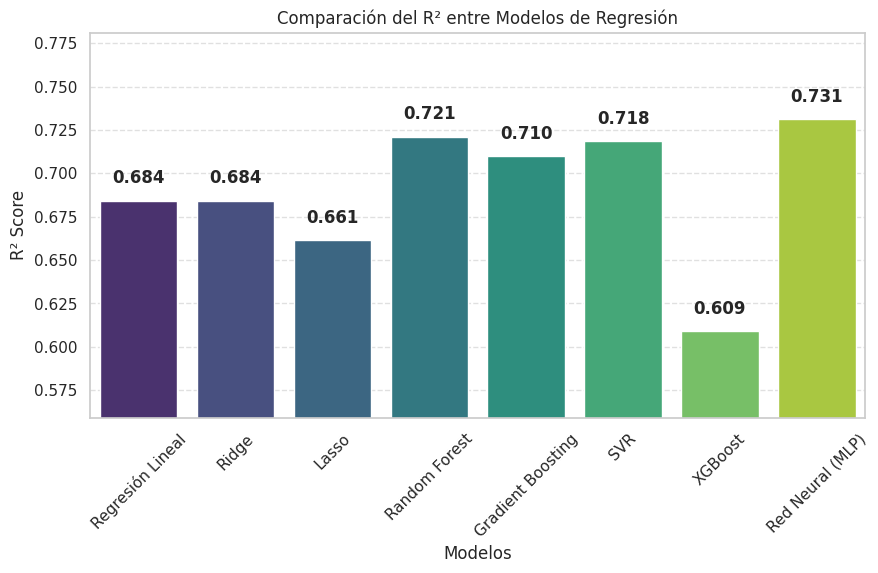

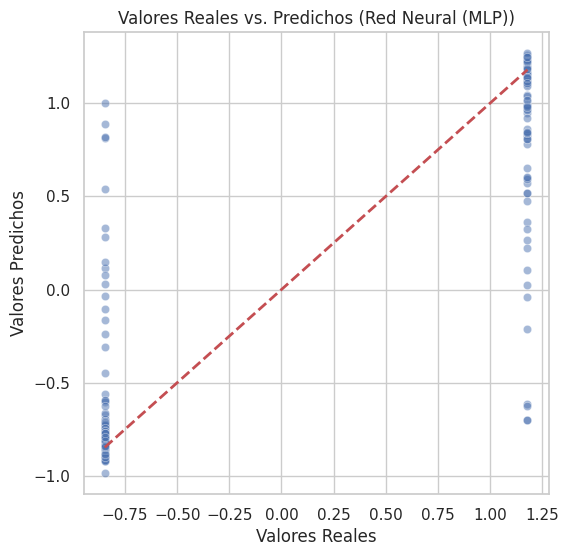

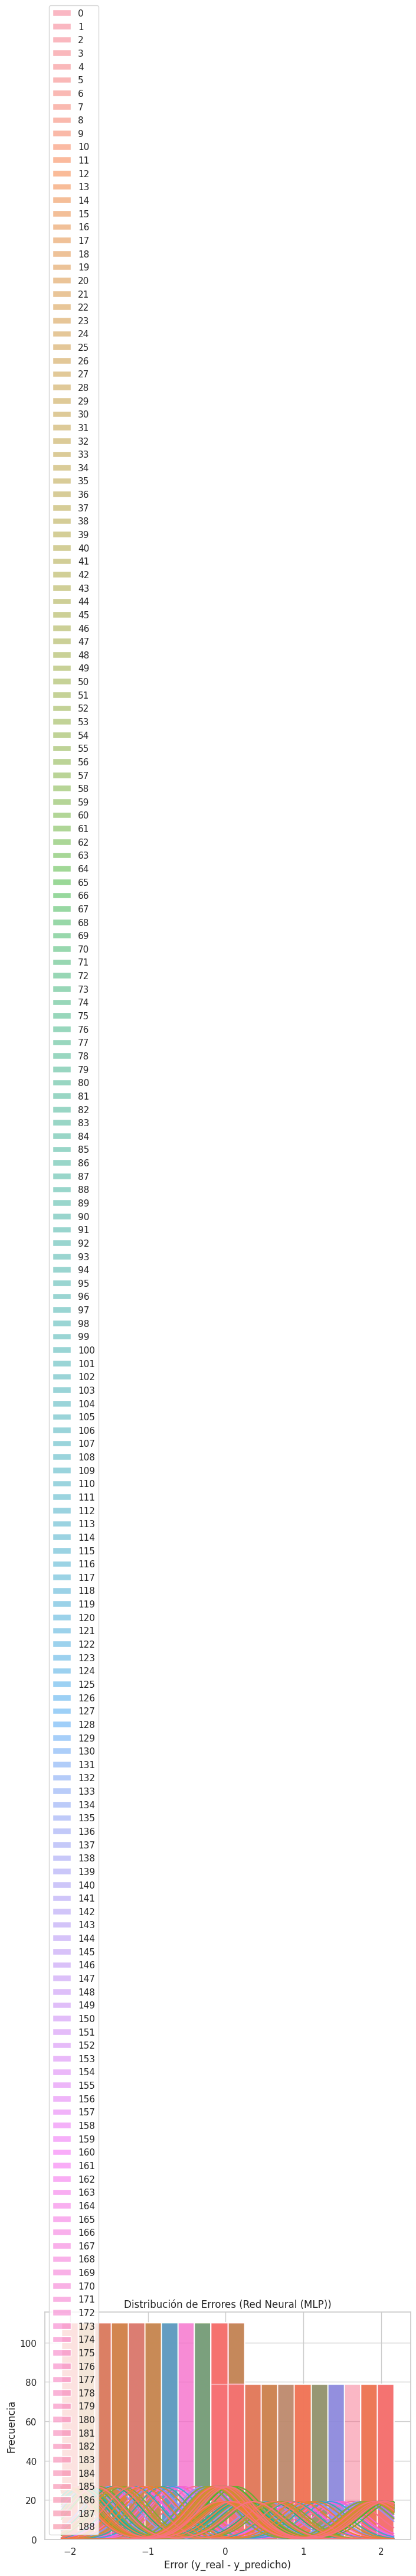

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mejora en la visualización de la comparación de R²
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette='viridis')

# Agregar etiquetas de los valores en las barras
for index, value in enumerate(resultados.values()):
    ax.text(index, value + 0.01, f'{value:.3f}', ha='center', fontsize=12, fontweight='bold')

# Ajustar los límites del eje Y para resaltar diferencias
plt.ylim(min(resultados.values()) - 0.05, max(resultados.values()) + 0.05)

plt.xlabel('Modelos')
plt.ylabel('R² Score')
plt.title('Comparación del R² entre Modelos de Regresión')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Evaluación del mejor modelo seleccionado
modelo_seleccionado = modelos[mejor_modelo]
y_pred_mejor = modelo_seleccionado.predict(X_test)

# Gráfico de dispersión entre valores reales y predichos
plt.figure(figsize=(6, 6))
#sns.scatterplot(x=y_test, y=y_pred_mejor, alpha=0.5)
sns.scatterplot(x=np.ravel(y_test), y=np.ravel(y_pred_mejor), alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Valores Reales vs. Predichos ({mejor_modelo})')
plt.show()

# Histograma de errores (residuos)
errores = y_test - y_pred_mejor
plt.figure(figsize=(8, 5))
sns.histplot(errores, bins=20, kde=True, color='blue')
plt.xlabel('Error (y_real - y_predicho)')
plt.ylabel('Frecuencia')
plt.title(f'Distribución de Errores ({mejor_modelo})')
plt.show()

# IX. GUARDAMOS EL MEJOR MODELO Y LOS SCALERS:

In [41]:
import joblib
# Guardar modelo y scalers
joblib.dump(modelo_seleccionado, 'mejor_modelo.pkl')
joblib.dump(scaler_x, 'scaler_x.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

# X. PRUEBA FINAL DEL MODELO:

In [42]:
modelo = joblib.load('/content/mejor_modelo.pkl')
scaler_x = joblib.load('/content/scaler_x.pkl')
scaler_y = joblib.load('/content/scaler_y.pkl')

In [49]:
aq = 5
uss = 2
voc = 1
temperature = 8

new_data = np.array([aq, uss, voc, temperature])
new_data = new_data.reshape(1, -1)
data_scaled = scaler_x.transform(new_data)
prediction_scaled = modelo.predict(data_scaled)
fail_predicted = scaler_y.inverse_transform(prediction_scaled.reshape(-1,1))
print(f'El estado de la máquina según los valores de funcionamiento: \nCalidad del Aire (aq): {aq} \nUltrasonido (uss): {uss} \nCompuesto Volatil Cercano (voc): {voc} \nTemperatura: {temperature} \nResulta: {fail_predicted[0][0]:.2f}')


El estado de la máquina según los valores de funcionamiento: 
Calidad del Aire (aq): 5 
Ultrasonido (uss): 2 
Compuesto Volatil Cercano (voc): 1 
Temperatura: 8 
Resulta: 0.18
